<a href='http://www.scienceacademy.ca'> <img style="float: left;height:70px" src="Log_SA.jpeg"></a>

# KMean Clustering Project Overview
## Varieties of the wheat seed dataset
Hi Guys,<br>
This is another real dataset which provides **measurements of the geometrical properties of kernels belonging to three different varieties of the wheat**. A soft X-ray technique and GRAINS package were used to construct all seven, real-valued attributes. Original dataset is available at UCI Machine Learning Repository [Seed dataset](https://archive.ics.uci.edu/ml/datasets/seeds). You can download the file and use it. <br>
However, I recommend using the file "**Seed_Data.csv**" which is provided in the course material. The file is processed for columns names, separators (longer than 1 characters and also of different form), while reading. The datafile contain following 7 features and 1 target class. 

Features are:
* A: Area 
* P: Perimeter  
* C: Compactness {C = 4*pi*A/P^2} 
* LK: Length of Kernel 
* WK: Width of Kernel
* A_Coef: Asymmetry Coefficient 
* LKG: Length of Kernel Groove<br>

Target Class is:
* target: target class (0, 1, 2)

<br>
<font style="font-size:14px;color:green;">&#9758; Please note, this is unsupervised learning project, the target class is not available in such learning. You can ignore the target class or use it for just to re-check what the algorithm is clustering!. </font>


Let's practice the skills we have just learned!

**The required libraries are imported as below.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

**Please read the datafile `Seed_Data.csv` and show the head of the file.**

In [2]:
# Code here please so that you don't lose the output
df = pd.read_csv('Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


**How many entries we have in the dataset?**

In [4]:
# Code here please so that you don't lose the output
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
A         210 non-null float64
P         210 non-null float64
C         210 non-null float64
LK        210 non-null float64
WK        210 non-null float64
A_Coef    210 non-null float64
LKG       210 non-null float64
target    210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


**Display the basic statistics, mean, std, max etc....**

In [5]:
# Code here please so that you don't lose the output
df.describe()

,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


,A,P,C,LK,WK,A_Coef,LKG,target
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,1.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,0.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,0.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,1.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,2.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,2.000000


## Exploratory Data Analysis

Let's do some EDA here, always good to know your data!

**How the area 'A' is related to the compactness 'C', create a scatter plot please. Luckily, we have the target values, pass it as hue argument!** Any comments on clusters!

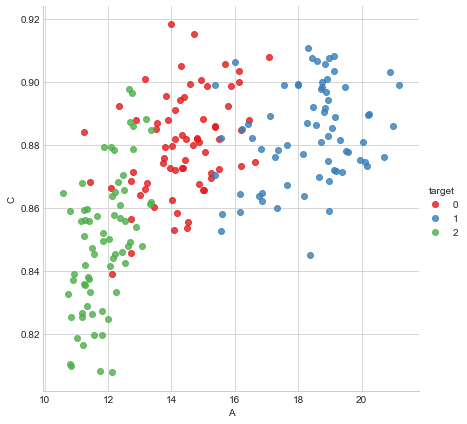

In [9]:
# Code here please so that you don't lose the output
sns.lmplot(x='A', y='C', data=df, hue='target',fit_reg=False,palette='Set1',size=6)


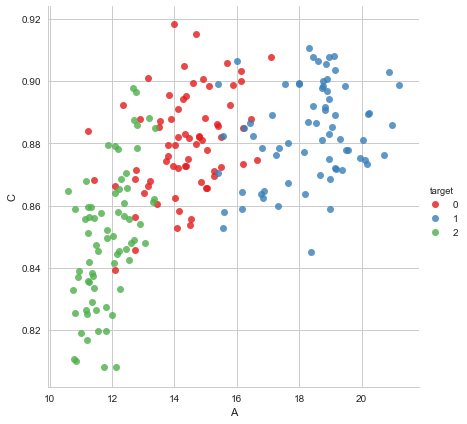

**Let's see, how area 'A' is related to the A_Coef using scatter plot.** Hint: `hue = target`

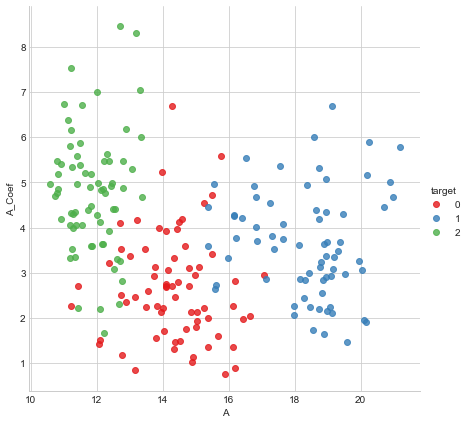

In [12]:
# Code here please so that you don't lose the outputs
sns.lmplot(x='A', y='A_Coef', data= df, hue='target',fit_reg=False,size=6,palette='Set1')

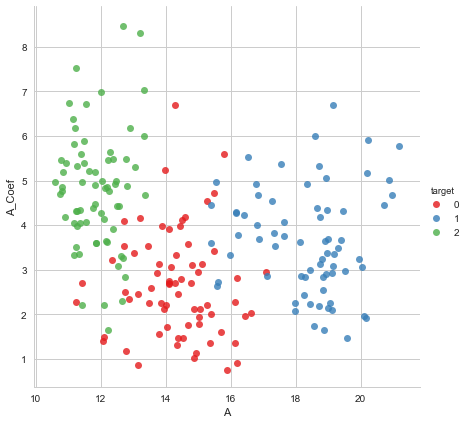

**Please re-create the plot below (a stacked histogram). If possible, please use use [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html).**

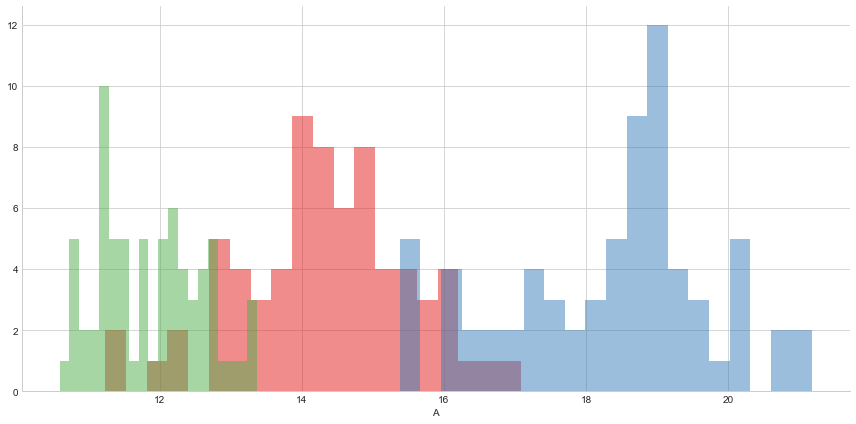

In [18]:
# Code here please so that you don't lose the output
g= sns.FacetGrid(data=df,hue='target',size=6,aspect=2,palette='Set1',)
g = g.map(plt.hist,'A',alpha = 0.5,bins = 20)

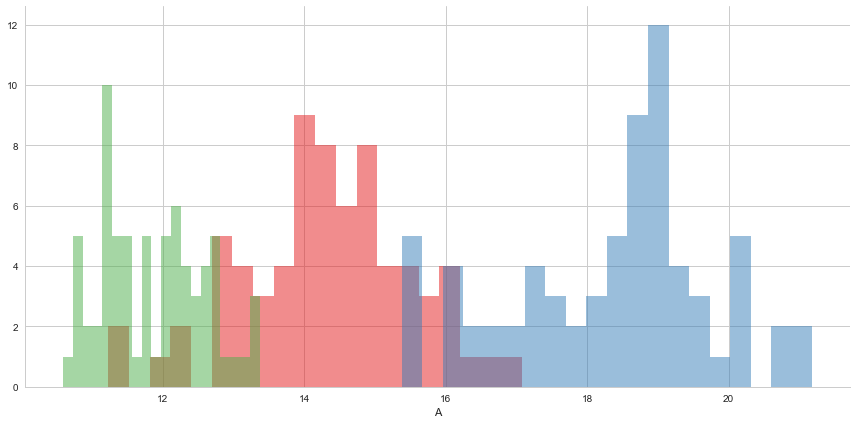

## KMeans Clustering

Time for machine learning using KMeans clustering unsupervised algorithm.<br>
**Import KMeans from SciKit-learn and create an instance of a KMeans model with 3 clusters.**

In [58]:
# Code here please so that you don't lose the output
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

**Fit the model to all the data except for the `'target'`.**

In [59]:
# Code here please so that you don't lose the output
kmeans.fit(df.drop('target',axis =1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

**How to get the cluster center vectors, pass them to 'centers' and get the output?**

In [60]:
# Code here please so that you don't lose the output
cent = kmeans.cluster_centers_
cent

array([[  1.87218033e+01,   1.62973770e+01,   8.85086885e-01,
          6.20893443e+00,   3.72267213e+00,   3.60359016e+00,
          6.06609836e+00,   4.44089210e-16],
       [  1.24033333e+01,   1.34209091e+01,   8.64766667e-01,
          5.23166667e+00,   2.96333333e+00,   2.83115455e+00,
          4.97857576e+00,   1.36363636e+00],
       [  1.50068333e+01,   1.46305000e+01,   8.80595000e-01,
          5.62316667e+00,   3.32261667e+00,   2.76883500e+00,
          5.24826667e+00,   2.00000000e+00],
       [  1.18969643e+01,   1.32605357e+01,   8.49042857e-01,
          5.23592857e+00,   2.85851786e+00,   5.31544643e+00,
          5.11560714e+00,   1.00000000e+00]])

array([[ 18.72180328,  16.29737705,   0.88508689,   6.20893443,
          3.72267213,   3.60359016,   6.06609836],
       [ 14.64847222,  14.46041667,   0.87916667,   5.56377778,
          3.27790278,   2.64893333,   5.19231944],
       [ 11.96441558,  13.27480519,   0.8522    ,   5.22928571,
          2.87292208,   4.75974026,   5.08851948]])

**You have the fitted model, get the labels for kmean and create a new column 'klabels' in your dataframe. Check the head of your dataframe now**

In [61]:
# Code here please so that you don't lose the output
df['klabels']=kmeans.labels_
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,2


,A,P,C,LK,WK,A_Coef,LKG,target,klabels
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,1


**Re-create the plots below:**<br>
Hint:<br>
* On the left, C parameter in `scatter()` is the predicted cluster class (`df['klabels'] or kmeans.labels_`). The centroid on the kmeans plot for the selected features (A and A_Coef) are shown as well. <br>
* On the right, target is passed as C parameter to `scatter()`.

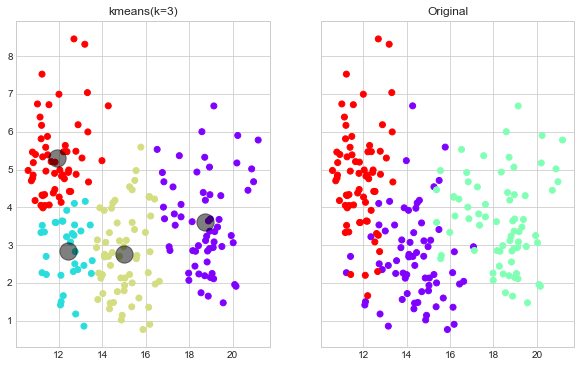

In [62]:
# Code here please so that you don't lose the output
fig,(x1,x2)=plt.subplots(nrows=1, ncols=2,sharey=True,figsize = (10,6))
x1.scatter(x=df['A'], y=df['A_Coef'],c=df['klabels'],cmap='rainbow')
x1.set_title('kmeans(k=3)')
x1.scatter(x=cent[:,0],y = cent[:,5],c ='black',s =300,alpha =.5)
x2.scatter(x=df['A'], y=df['A_Coef'],c=df['target'],cmap='rainbow')
x2.set_title('Original')



In [63]:
from sklearn.metrics import confusion_matrix,classification_report

In [64]:
print(confusion_matrix(df['target'],df['klabels']))
print(classification_report(df['target'],df['klabels']))

[[ 1 17 50  2]
 [60  0 10  0]
 [ 0 16  0 54]
 [ 0  0  0  0]]
             precision    recall  f1-score   support

          0       0.02      0.01      0.02        70
          1       0.00      0.00      0.00        70
          2       0.00      0.00      0.00        70
          3       0.00      0.00      0.00         0

avg / total       0.01      0.00      0.01       210



C:\Users\User1\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


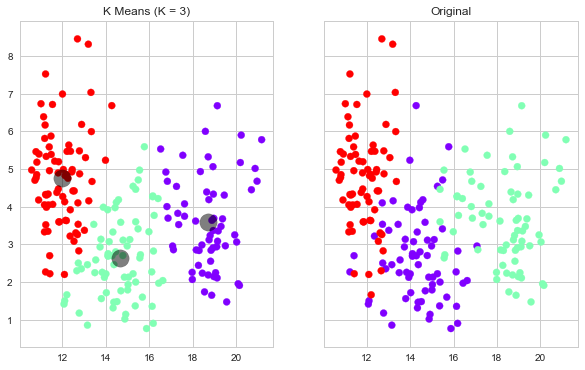

## Elbow point 
**Estimate the elbow point to see if our selection for K was right!**

In [49]:
# Code here please so that you don't lose the output
sum_sqr = {}
for k in range (1,10):
    kmeans = KMeans(n_clusters=k).fit(df.drop('target',axis =1))
    sum_sqr[k]=kmeans.inertia_

In [25]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}
# Let's test for K from 1 to 10, we can use range() function here! remember?
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k).fit(df.drop('target',axis=1))
    # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
    sum_square[k] = kmeans.inertia_ 

**Generate the elbow plot given below!****

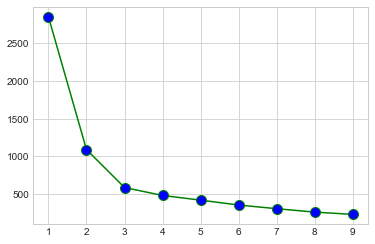

In [55]:
# Code here please so that you don't lose the output
plt.plot(list(sum_sqr.keys()), list(sum_sqr.values()),color='green', linestyle='-', marker='o',
         markerfacecolor='blue', markersize=10)

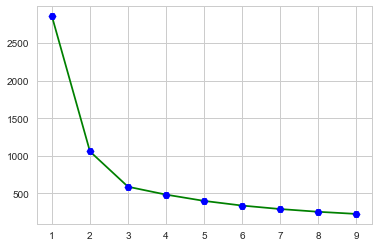

## Excellent !
#### We are done with the KMeans clustering, I hope you enjoyed the lecture, Let's move on to the next one!

<br><br><br>
Just to check and for fun, if you are intested, you can print the **confusion matrix and classification report** in this case, because we were provided with the target values. However, confusion matrix and classification reports are not the evaluation process hence they are not parts in the unsupervised learning!<br>
* `from sklearn.metrics import confusion_matrix,classification_report`<br>
* `print(confusion_matrix(df['target'],kmeans.labels_))`<br>
* `print(classification_report(df['target'],kmeans.labels_))`<br>